Research question: Does the time of participation in social activities affect the level of happiness?

Variables: 

overall social time:independent variable

life satisfaction score(WELLNESS_life_satisfaction): dependent variable

In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('CSCS_data_anon.csv', low_memory=False)

# Replace all NA values with 0 in the dataset
df.fillna(0, inplace=True)

# Calculate the overall social time by summing the specified columns
df['overall_social_time'] = df[['CONNECTION_social_time_family_p7d', 'CONNECTION_social_time_neighbours_p7d']].sum(axis=1)

# Select the required columns
filtered_df = df[['overall_social_time', 'WELLNESS_life_satisfaction']]

# Display the first few rows to confirm
filtered_df.head()

,overall_social_time,WELLNESS_life_satisfaction
0,9.0,2.0
1,9.0,7.0
2,3.0,5.0
3,11.0,4.0
4,0.0,8.0


In [10]:
# Remove rows with missing values in the specified columns
df_cleaned = filtered_df.dropna(subset=['overall_social_time', 'WELLNESS_life_satisfaction'])

# (Optional) If you have specific criteria for filtering rows, you can add them here
# For now, this example doesn't include specific criteria like in the original code

# Check the number of rows remaining
remaining_rows = len(df_cleaned)

# Print the result
print(f"Number of rows left after removing missing values: {remaining_rows}")

Number of rows left after removing missing values: 11431


In [11]:
# Inspect the first few rows of the cleaned dataset
print(df_cleaned.head())

# Check the unique values in the 'WELLNESS_life_satisfaction' column
unique_life_satisfaction = df_cleaned['WELLNESS_life_satisfaction'].unique()

# Print the unique values
print("Unique values in 'WELLNESS_life_satisfaction' column:", unique_life_satisfaction)

# Verify no missing values remain in the dataset
print("Missing values in each column after cleaning:")
print(df_cleaned.isnull().sum())

   overall_social_time  WELLNESS_life_satisfaction
0                  9.0                         2.0
1                  9.0                         7.0
2                  3.0                         5.0
3                 11.0                         4.0
4                  0.0                         8.0
Unique values in 'WELLNESS_life_satisfaction' column: [ 2.  7.  5.  4.  8.  1.  6.  9.  0.  3. 10.]
Missing values in each column after cleaning:
overall_social_time           0
WELLNESS_life_satisfaction    0
dtype: int64


In [13]:
# Group by 'WELLNESS_life_satisfaction' and calculate descriptive statistics for 'overall_social_time'
grouped_stats = df_cleaned.groupby('overall_social_time')['WELLNESS_life_satisfaction'].describe()

# Display the grouped statistics
grouped_stats

,count,mean,std,min,25%,50%,75%,max
overall_social_time,,,,,,,,
0.0,6011.0,4.406255,3.374464,0.0,0.0,5.0,7.0,10.0
1.0,580.0,5.310345,2.650688,0.0,3.0,6.0,7.0,10.0
2.0,588.0,5.807823,2.567416,0.0,4.0,6.0,8.0,10.0
3.0,439.0,5.656036,2.429396,0.0,4.0,6.0,7.0,10.0
4.0,403.0,6.270471,2.484539,0.0,5.0,7.0,8.0,10.0
...,...,...,...,...,...,...,...,...
238.0,1.0,10.000000,NaN,10.0,10.0,10.0,10.0,10.0
248.0,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0
265.0,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0


Scatter plot:

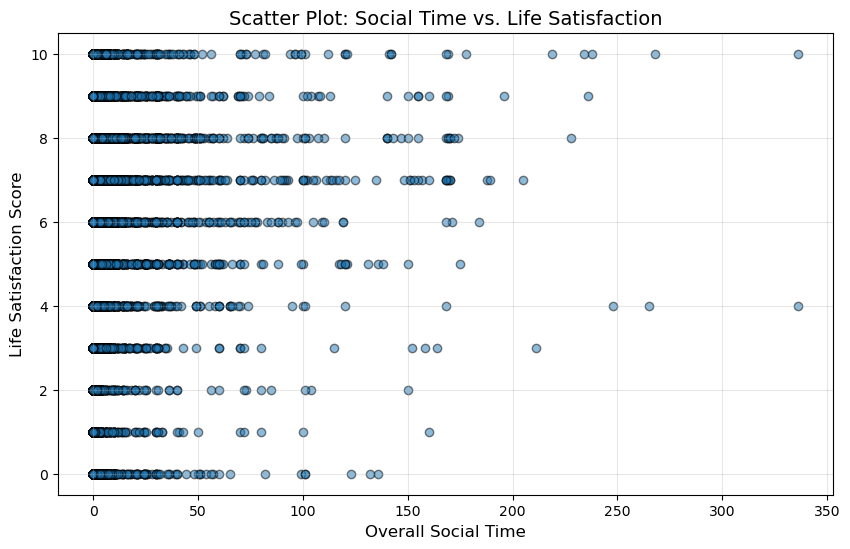

In [14]:
import matplotlib.pyplot as plt

# Scatter plot: Social time vs. Life satisfaction
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['overall_social_time'], df_cleaned['WELLNESS_life_satisfaction'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Social Time vs. Life Satisfaction', fontsize=14)
plt.xlabel('Overall Social Time', fontsize=12)
plt.ylabel('Life Satisfaction Score', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

box plot:

<Figure size 1200x600 with 0 Axes>

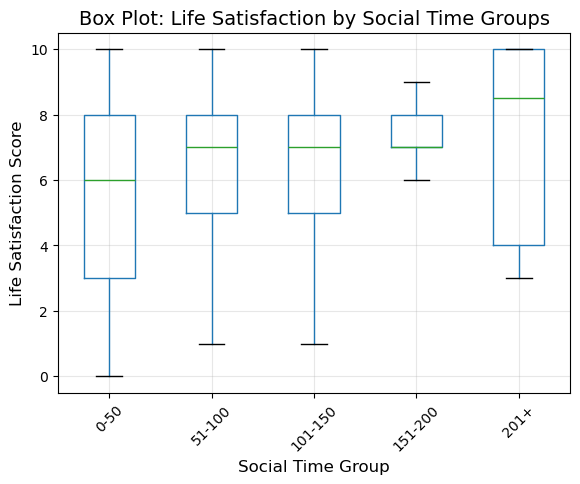

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorize overall social time into 5 groups
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201+']
df_cleaned['social_time_group'] = pd.cut(df_cleaned['overall_social_time'], bins=bins, labels=labels, right=False)

# Box plot: Life satisfaction scores for each social time group
plt.figure(figsize=(12, 6))
df_cleaned.boxplot(column='WELLNESS_life_satisfaction', by='social_time_group', grid=False, showfliers=False)
plt.title('Box Plot: Life Satisfaction by Social Time Groups', fontsize=14)
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Social Time Group', fontsize=12)
plt.ylabel('Life Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

histogram:

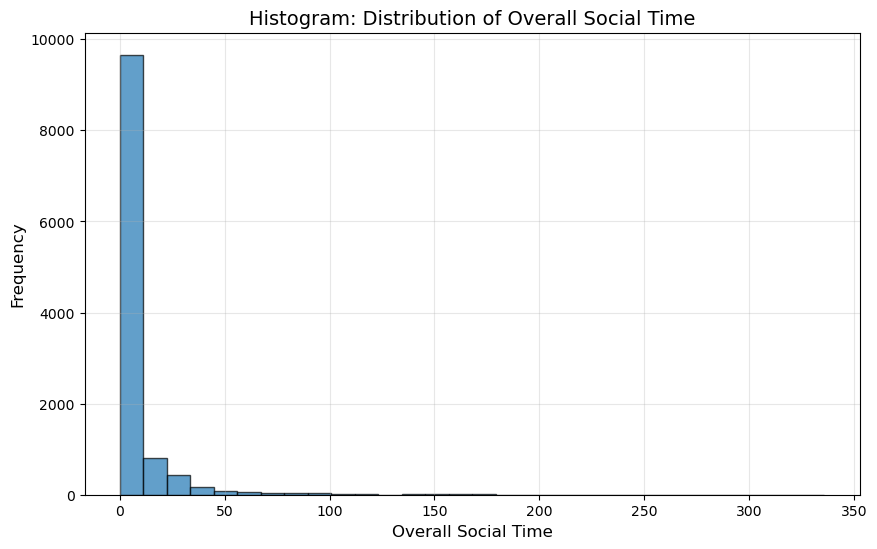

In [18]:
import matplotlib.pyplot as plt

# Histogram: Distribution of overall social time
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['overall_social_time'], bins=30, alpha=0.7, edgecolor='k')
plt.title('Histogram: Distribution of Overall Social Time', fontsize=14)
plt.xlabel('Overall Social Time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Linear Regression analysis:

Correlation coefficient: 0.15
P-value: 0.0000
                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.021
Model:                                    OLS   Adj. R-squared:                  0.021
Method:                         Least Squares   F-statistic:                     250.4
Date:                        Wed, 27 Nov 2024   Prob (F-statistic):           8.23e-56
Time:                                21:09:10   Log-Likelihood:                -29087.
No. Observations:                       11431   AIC:                         5.818e+04
Df Residuals:                           11429   BIC:                         5.819e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.9

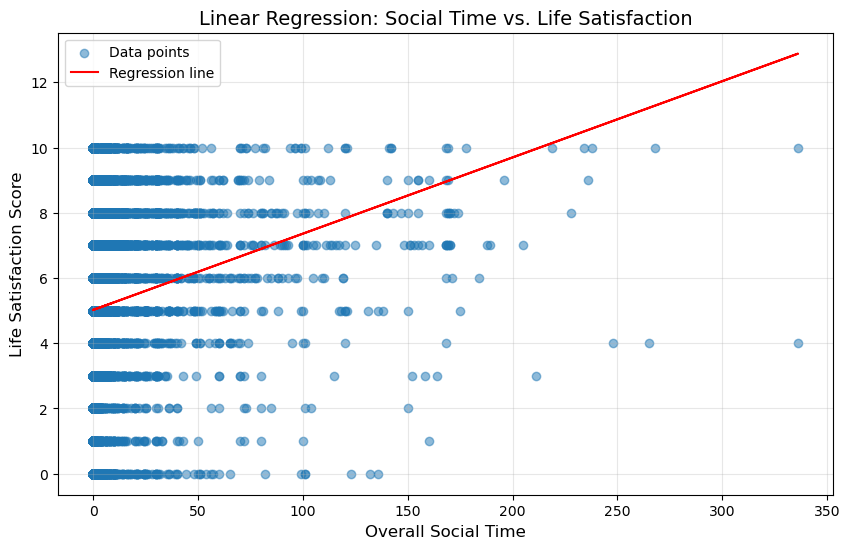

In [20]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Correlation analysis: Pearson correlation coefficient
correlation, p_value = stats.pearsonr(df_cleaned['overall_social_time'], df_cleaned['WELLNESS_life_satisfaction'])
print(f"Correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Linear regression analysis
# Independent variable (X) and dependent variable (Y)
X = df_cleaned['overall_social_time']
Y = df_cleaned['WELLNESS_life_satisfaction']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Summary of the regression model
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['overall_social_time'], df_cleaned['WELLNESS_life_satisfaction'], alpha=0.5, label='Data points')
plt.plot(df_cleaned['overall_social_time'], model.predict(X), color='red', label='Regression line')
plt.title('Linear Regression: Social Time vs. Life Satisfaction', fontsize=14)
plt.xlabel('Overall Social Time', fontsize=12)
plt.ylabel('Life Satisfaction Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The correlation analysis shows a positive but weak relationship between overall social time and life satisfaction, with a correlation coefficient of 0.15. Although the correlation is statistically significant (p-value = 0.0000), the strength of the relationship suggests that social time alone explains only a small proportion of the variability in life satisfaction.

The linear regression analysis reinforces this finding. The regression coefficient for overall_social_time is 0.0234, indicating that for each additional unit of social time, the life satisfaction score increases by approximately 0.023 points on average. The R-squared value of 0.021 suggests that only 2.1% of the variance in life satisfaction scores can be attributed to differences in overall social time. While the F-statistic (250.4) and its associated p-value confirm the statistical significance of the model, the low R-squared value highlights that other factors likely play a more substantial role in determining life satisfaction.

Overall, while there is a statistically significant relationship between social time and life satisfaction, the effect size is small, and social time alone is not a strong predictor of life satisfaction.

Now I did something new: divide the overall social time into 11 groups: 0-20,21-40,41-60,61-80,81-100, 101-120, 121-140, 141-160, 161-180, 181-200, 201+. I used the mean of satisfaction score as the satisfaction score of each group, and I did the linear regression above again.

                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.545
Model:                                    OLS   Adj. R-squared:                  0.494
Method:                         Least Squares   F-statistic:                     10.77
Date:                        Wed, 27 Nov 2024   Prob (F-statistic):            0.00951
Time:                                21:26:04   Log-Likelihood:                -7.9361
No. Observations:                          11   AIC:                             19.87
Df Residuals:                               9   BIC:                             20.67
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipykernel_52/1833350081.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_cleaned.groupby('social_time_group')['WELLNESS_life_satisfaction'].mean().reset_index()
/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


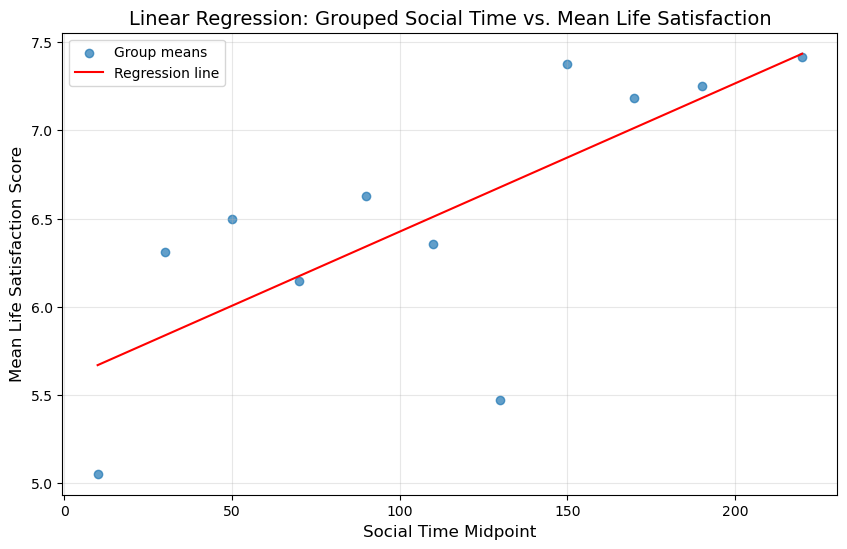

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'CSCS_data_anon.csv'  # Replace with your file path
df = pd.read_csv(file_path, low_memory=False)

# Replace all NA values with 0 in the dataset
df.fillna(0, inplace=True)

# Calculate the overall social time by summing the specified columns
df['overall_social_time'] = df[['CONNECTION_social_time_family_p7d', 'CONNECTION_social_time_neighbours_p7d']].sum(axis=1)

# Select the required columns and remove rows with missing values
df_cleaned = df[['overall_social_time', 'WELLNESS_life_satisfaction']].dropna(subset=['overall_social_time', 'WELLNESS_life_satisfaction'])

# Divide overall social time into 11 groups
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, float('inf')]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200', '201+']
df_cleaned['social_time_group'] = pd.cut(df_cleaned['overall_social_time'], bins=bins, labels=labels, right=False)

# Calculate the mean life satisfaction score for each group
grouped_data = df_cleaned.groupby('social_time_group')['WELLNESS_life_satisfaction'].mean().reset_index()

# Assign the midpoint of each group as the representative value for overall social time
midpoints = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 220]  # Midpoints of each bin
grouped_data['social_time_midpoint'] = midpoints

# Perform linear regression
X_grouped = grouped_data['social_time_midpoint']
Y_grouped = grouped_data['WELLNESS_life_satisfaction']
X_grouped = sm.add_constant(X_grouped)  # Add constant for intercept
model_grouped = sm.OLS(Y_grouped, X_grouped).fit()

# Regression summary
print(model_grouped.summary())

# Scatter plot with regression line for grouped data
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['social_time_midpoint'], grouped_data['WELLNESS_life_satisfaction'], alpha=0.7, label='Group means')
plt.plot(grouped_data['social_time_midpoint'], model_grouped.predict(X_grouped), color='red', label='Regression line')
plt.title('Linear Regression: Grouped Social Time vs. Mean Life Satisfaction', fontsize=14)
plt.xlabel('Social Time Midpoint', fontsize=12)
plt.ylabel('Mean Life Satisfaction Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The linear regression analysis using grouped social time data provides stronger evidence for a positive relationship between social time and life satisfaction. The regression coefficient for social_time_midpoint is 0.0084, indicating that for every 10-unit increase in the midpoint of social time, the mean life satisfaction score increases by approximately 0.084 points. This suggests a small but consistent positive trend.

The R-squared value of 0.545 shows that approximately 54.5% of the variance in mean life satisfaction scores can be explained by differences in social time groups. This is a significant improvement compared to the previous analysis with individual data points, where the R-squared value was much smaller. This highlights that aggregating the data into groups and using the mean satisfaction scores captures a clearer relationship between social time and life satisfaction.

The scatter plot visually supports this result, showing a positive trend between the midpoint of social time and the mean life satisfaction score. The regression line fits the grouped data well, further confirming the robustness of the relationship. These results suggest that higher levels of social time are strongly associated with higher average life satisfaction, reinforcing the importance of social interactions for well-being.

motivation:

The motivation of this research is to explore the relationship between social time and life satisfaction, quantifying how the amount of social engagement impacts well-being. In an era marked by digital connectivity but increasing social fragmentation, understanding this connection is essential for guiding individual decisions and shaping community-level strategies to enhance happiness. By analyzing both raw and grouped data, this study aims to provide a robust and nuanced understanding of how social time contributes to life satisfaction, offering practical insights for individuals, policymakers, and mental health initiatives focused on improving overall well-being.

limits:

1.Self-reported Data: The use of self-reported measures for life satisfaction and social time introduces the possibility of bias, as responses may be influenced by personal interpretation, mood, or social desirability.

2.Causality vs. Correlation: While the analysis identifies a positive relationship between social time and life satisfaction, it does not establish causality. It is unclear whether more social time leads to higher life satisfaction or if more satisfied individuals tend to engage in more social activities.

3.Unmeasured Variables: Factors such as the quality of social interactions, individual personality traits, socioeconomic status, or cultural differences are not accounted for in this study but may significantly influence the relationship between social time and life satisfaction.

4.Grouping Effect: While grouping social time into intervals provides clarity, it reduces individual-level variability and may oversimplify the complex dynamics of social engagement.